# Librerias a usar.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, Markdown
from IPython.display import display, HTML
from sklearn.ensemble import IsolationForest
from pycaret.regression import *


# Creación del Data Frame.

In [2]:
# pd.read_csx('URL/Directorio') crea el DataFrame. 'r' permite movernos entre directorios, forzar a que la ruta funcione.

df_calendar = pd.read_csv(r'calendar.csv') 
df_listings = pd.read_csv(r'listings.csv') 
df_neighbourhoods = pd.read_csv(r'neighbourhoods.csv') 
df_reviews = pd.read_csv(r'reviews.csv') 


df_list = [df_calendar,df_listings,df_neighbourhoods,df_reviews]



# Procesado de los datos.

Información general del Data Frame (tipo de datos, tamaño, numero de columnas, filas, ...)

In [3]:
# Diccionario de DataFrames.
df_dict = {
    'df_calendar': df_calendar,
    'df_listings': df_listings,
    'df_neighbourhoods': df_neighbourhoods,
    'df_reviews': df_reviews
}

# Imprimir nombre e información del DataFrame.
for df_name, df in df_dict.items():
    print('/n')
    print(f"Nombre del DataFrame: {df_name}")
    print('\n')
    print(df.info())
    print('\n')
    print(df.describe().T)
    print('\n')
    print(df.head())
    print('\n')
    print('\n')
    print('\n')
    

/n
Nombre del DataFrame: df_calendar


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9770625 entries, 0 to 9770624
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 521.8+ MB
None


                    count          mean           std      min         25%  \
listing_id      9770625.0  4.186920e+17  4.303521e+17  35797.0  37082763.0   
adjusted_price        0.0           NaN           NaN      NaN         NaN   
minimum_nights  9770608.0  5.891863e+00  3.233924e+01      1.0         1.0   
maximum_nights  9770608.0  7.990121e+02  4.673662e+02      1.0       365.0   

                         50%           75%           max  
listing_id      5.102289e+17  8.557169e+17  1.053802e+18  
adjusted

Reparar los nombres de las columnas (eliminando los espacios que no sean caracteres).


In [4]:
for df_name, df in df_dict.items():
    df.columns = df.columns.str.strip()

Comprobar datos duplicados.

In [5]:
for df_name, df in df_dict.items():
    datos_duplicados = df.duplicated().sum()
    print(f'Hay {datos_duplicados} datos duplicados en {df_name}.')

Hay 0 datos duplicados en df_calendar.
Hay 0 datos duplicados en df_listings.
Hay 0 datos duplicados en df_neighbourhoods.
Hay 0 datos duplicados en df_reviews.


In [6]:
for df_name, df in df_dict.items():
    display(df.head())

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,35797,2023-12-28,f,$200.00,NaN,1.0,7.0
1,35797,2023-12-29,f,$200.00,NaN,1.0,7.0
2,35797,2023-12-30,t,$200.00,NaN,1.0,7.0
3,35797,2023-12-31,t,$200.00,NaN,1.0,7.0
4,35797,2024-01-01,t,$200.00,NaN,1.0,7.0


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20231226034326,2023-12-28,city scrape,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,NaN,"Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20231226034326,2023-12-27,city scrape,Home in Mexico City · ★4.58 · 5 bedrooms · 8 b...,NaN,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,13,4,2,0,0.43
2,1441434,https://www.airbnb.com/rooms/1441434,20231226034326,2023-12-27,city scrape,Condo in Mexico City · ★4.90 · 1 bedroom · 1 b...,NaN,It is located within walking distance from res...,https://a0.muscache.com/pictures/eccbf27f-463e...,7740056,...,4.88,4.96,4.89,NaN,f,1,1,0,0,1.75
3,607833,https://www.airbnb.com/rooms/607833,20231226034326,2023-12-28,city scrape,Rental unit in Mexico City · ★4.83 · 1 bedroom...,NaN,The area. <br />The people are nice and hel...,https://a0.muscache.com/pictures/20389315/55ab...,1849414,...,4.83,4.50,4.67,NaN,f,1,0,1,0,0.05
4,609012,https://www.airbnb.com/rooms/609012,20231226034326,2023-12-27,city scrape,Rental unit in Mexico City · ★4.67 · 1 bedroom...,NaN,NaN,https://a0.muscache.com/pictures/10209260/f638...,2944126,...,4.59,4.59,4.59,NaN,f,1,1,0,0,0.16


,neighbourhood_group,neighbourhood
0,NaN,Álvaro Obregón
1,NaN,Azcapotzalco
2,NaN,Benito Juárez
3,NaN,Coyoacán
4,NaN,Cuajimalpa de Morelos


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44616,706908,2011-11-09,634733,Lindsay,Forget staying in a hotel. Stay at condesa hau...
1,44616,2006160,2012-08-16,3087087,Samuel,"Fantastic location, great place, friendly host..."
2,44616,3174954,2012-12-28,3234920,Anna,I would highly recommend Condesa Haus for anyo...
3,44616,3271579,2013-01-04,2199822,Shelley And Pall,Great stay. Thanks. Highly recommend.
4,607833,7570893,2013-09-24,8531917,Daniel,We had a great stay with Omar. We know DF ver...


Porcentaje de valores nulos en cada columna.

In [7]:
for df_name, df in df_dict.items():
    # Calcular el porcentaje de valores nulos por columna
    valores_nulos_por_columna = df.isnull().mean() * 100
    # Filtrar solo las columnas con valores nulos
    columnas_con_nulos = valores_nulos_por_columna[valores_nulos_por_columna >= 0]
    # Crear una tabla HTML para la presentación
    if not columnas_con_nulos.empty:
        html = f"<h3>{df_name}</h3>"
        html += columnas_con_nulos.to_frame(name='Porcentaje de valores nulos').to_html()
        display(HTML(html))
    else:
        display(HTML(f"<h3>{df_name}</h3><p>No hay valores nulos.</p>"))
    #print('\n\n',df_name, '\n\nPorcentaje de valores nulos por columna:\n', valores_nulos_por_columna, '%.\n\n')


,Porcentaje de valores nulos
listing_id,0.000000
date,0.000000
available,0.000000
price,0.000000
adjusted_price,100.000000
minimum_nights,0.000174
maximum_nights,0.000174


,Porcentaje de valores nulos
id,0.000000
listing_url,0.000000
scrape_id,0.000000
last_scraped,0.000000
source,0.000000
name,0.000000
description,100.000000
neighborhood_overview,37.866218
picture_url,0.000000
host_id,0.000000


,Porcentaje de valores nulos
neighbourhood_group,100.0
neighbourhood,0.0


,Porcentaje de valores nulos
listing_id,0.000000
id,0.000000
date,0.000000
reviewer_id,0.000000
reviewer_name,0.000190
comments,0.011328


In [8]:
pd.set_option('display.max_columns', None)

Eliminar columnas no deseadas.

In [9]:
columnas_a_eliminar = ['calculated_host_listings_count_entire_homes','host_url', 'host_name', 'host_about','availability_30', 'availability_60' ,'availability_90', 'availability_365', 'calendar_last_scraped','calculated_host_listings_count_private_rooms','host_thumbnail_url', 'host_picture_url','bathrooms', 'bedrooms','amenities','calculated_host_listings_count_shared_rooms', 'scrape_id', 'last_scraped', 'source',] 
df_listings_limpio = df_listings.drop(columns=columnas_a_eliminar)

Crear columna 'total_reviews'.

In [ ]:
df_listings_limpio['total_reviews'] = df_listings_limpio[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']].sum(axis=1)

Crear un diccionario para mapear los barrios a valores numéricos del 1 al 16.

In [10]:
neighbourhood_dict = {
    'Álvaro Obregón': 1,
    'Azcapotzalco': 2,
    'Benito Juárez': 3,
    'Coyoacán': 4,
    'Cuajimalpa de Morelos': 5,
    'Cuauhtémoc': 6,
    'Gustavo A. Madero': 7,
    'Iztacalco': 8,
    'Iztapalapa': 9,
    'La Magdalena Contreras': 10,
    'Miguel Hidalgo': 11,
    'Milpa Alta': 12,
    'Tláhuac': 13,
    'Tlalpan': 14,
    'Venustiano Carranza': 15,
    'Xochimilco': 16
}

# Barrios a valores numéricos.
df_listings_limpio['neighbourhood_group_cleansed'] = df_listings_limpio['neighbourhood_cleansed'].map(neighbourhood_dict)


Juntar los df.

In [11]:
df_completo = pd.merge( df_reviews, df_listings_limpio, left_on='listing_id', right_on='id', how='inner') 

Transformar df calendar.

In [12]:
# Convertir la columna 'date' a tipo datetime
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

# Limpiar la columna 'price' para eliminar caracteres no numéricos y convertirla a tipo numérico.
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Filtrar por el año 2023.
df_calendar_2023 = df_calendar[df_calendar['date'].dt.year == 2023]

# Agrupar por 'listing_id' y año, calcular el precio medio.
df_calendar_2023 = df_calendar_2023.groupby(['listing_id', df_calendar_2023['date'].dt.year])['price'].mean().reset_index()
df_calendar_2023.rename(columns={'date': 'year', 'price': 'average_price'}, inplace=True)

# Guardar el resultado.
#df_calendar_2023.to_csv("precio_medio_2023.csv", index=False)


Juntar los df.

In [13]:
df_completo = pd.merge(df_completo, df_calendar_2023, on='listing_id', how='left')

Eliminar otras columnas.

In [14]:
columnas_origen = ['host_listings_count','host_total_listings_count','host_location', 'license','neighbourhood', 'host_neighbourhood']
df_completo.drop(columns=columnas_origen, inplace=True)

Eliminar columnas con alto % de nulos.

In [15]:
# Calcular el porcentaje de valores nulos por columna.
porcentaje_nulos = df_completo.isnull().mean()

# Obtener las columnas que tienen más del 70% de valores nulos.
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > 0.35].index

# Eliminar las columnas seleccionadas.
df_completo = df_completo.drop(columns=columnas_a_eliminar)


Reparar datos faltantes y nulos por media, moda y mediana junto a KNN.

In [16]:
import numpy as np
from sklearn.impute import KNNImputer

def reparar_nulos(df, col):
    """
    La función repara valores nulos en un Data Frame sin importar cual sea el tipo de dato.
    Reemplazo valores enteros, reales o no numericos con la mediana, la media y la moda respectivamente.
    """
    # Porcentaje de valores nulos en la columna
    null_percentage = df[col].isnull().sum() / len(df)
    
    # Si el porcentaje de valores nulos está entre el 10% y el 35%, aplicamos k-nearest neighbors
    if 0.1 <= null_percentage <= 0.35:
        # Verificamos si la columna es numérica
        if np.issubdtype(df[col].dtype, np.number):
            imputer = KNNImputer(n_neighbors=5)
            df[col] = imputer.fit_transform(df[[col]])
    else:
        # Para rellenar números enteros aplico la mediana.
        if np.issubdtype(df[col].dtype, np.integer):
            df[col] = df[col].fillna(df[col].median())
        # Para rellenar números reales aplico la media.
        elif np.issubdtype(df[col].dtype, np.floating):
            df[col] = df[col].fillna(df[col].mean())
        # Para valores no numéricos uso la moda.
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
    
    # Devuelvo valores corregidos a mi Data Frame.
    return df

# Ahora itera sobre las columnas del DataFrame para reparar los valores nulos
for col in df_completo.columns:
    reparar_nulos(df_completo, col)


Compruebo si se han reparado los valores nulos.

In [17]:
print('Porcentaje de valores nulos por columna:', df_completo.isnull().mean() * 100, '%.\n\n')

Porcentaje de valores nulos por columna: listing_id                         0.000000
id_x                               0.000000
date                               0.000000
reviewer_id                        0.000000
reviewer_name                      0.000000
comments                           0.000000
id_y                               0.000000
listing_url                        0.000000
name                               0.000000
neighborhood_overview             23.228013
picture_url                        0.000000
host_id                            0.000000
host_since                         0.000000
host_response_time                 0.000000
host_response_rate                 0.000000
host_acceptance_rate               0.000000
host_is_superhost                  0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed             0.000000
neighbourhood_group_cleansed       

Separación de los datos de la columna 'name'.

In [27]:
df_completo['name'].value_counts(5)

Rental unit in Mexico City · ★4.92 · 1 bedroom · 1 bed · 1 bath             4.487502e-03
Rental unit in Mexico City · ★4.85 · 1 bedroom · 1 bed · 1 bath             3.941082e-03
Rental unit in Mexico City · ★4.93 · 1 bedroom · 1 bed · 1 bath             3.652640e-03
Rental unit in Mexico City · ★4.90 · 1 bedroom · 1 bed · 1 bath             3.530790e-03
Rental unit in Mexico City · ★4.77 · 1 bedroom · 1 bed · 1 bath             3.420364e-03
                                                                                ...     
Rental unit in Mexico City · 1 bedroom · 2.5 baths                          9.519521e-07
Guesthouse in Del Valle Norte · 1 bedroom · 1 bed · 1 bath                  9.519521e-07
Houseboat in Mexico City · 3 bedrooms · 5 beds · 3 shared baths             9.519521e-07
Serviced apartment in Mexico City · 1 bedroom · 1 bed · 1.5 shared baths    9.519521e-07
Home in Mexico City · 6 bedrooms · 6 beds · 3.5 baths                       9.519521e-07
Name: name, Length: 9

In [ ]:
import numpy as np

# Convertir la columna 'name' a cadenas de texto.
df_completo['name'] = df_completo['name'].astype(str)

# Dividir el contenido de la columna 'name' utilizando ' · ' como separador.
split_name = df_completo['name'].str.split(' · ', expand=True)

# Convertir todas las cadenas a minúsculas.
split_name = split_name.apply(lambda x: x.str.lower())

# Definir un diccionario para mapear valores.
map_shared = {'shared': 1}

# Definir la función para extraer información.
def extract_info(row):
    if row['name'].count(' · ') == 4:
        # Extraer el texto antes de 'in' para la primera columna.
        row['tipo_de_casa'] = split_name.loc[row.name, 0].split(' in ')[0]

        # Extraer el texto después de 'in' para la segunda columna.
        row['localizacion'] = split_name.loc[row.name, 0].split(' in ')[1]

        # Eliminar la estrella y convertir el valor numérico a float para la tercera columna.
        row['calificacion_propiedad'] = split_name.loc[row.name, 1].replace('★', '')

        # Extraer el valor numérico de habitaciones y camas de las respectivas partes del texto.
        row['habitaciones'] = float(split_name.loc[row.name, 2].split()[0]) if 'bedroom' in split_name.loc[row.name, 2] or 'beds' in split_name.loc[row.name, 2] else None
        row['camas'] = float(split_name.loc[row.name, 3].split()[0]) if 'bed' in split_name.loc[row.name, 3] or 'beds' in split_name.loc[row.name, 3] else None

        # Verificar si hay información sobre baños en la cuarta parte del texto.
        if len(split_name.columns) > 3:
            # Extraer el valor numérico de baños de la cuarta parte del texto si hay un número junto a 'bath' o 'baths'.
            if any(char.isdigit() for char in split_name.loc[row.name, 4]):
                row['banhos'] = float(split_name.loc[row.name, 4].split()[0]) if 'bath' in split_name.loc[row.name, 4] or 'baths' in split_name.loc[row.name, 4] else None
                row['baño_compartido'] = 0
            else:
                row['banhos'] = np.nan
                row['baño_compartido'] = 0
        else:
            row['banhos'] = None
            row['baño_compartido'] = 0
    else:
        # Asignar valores nulos a las columnas para las filas que no cumplen con el criterio.
        row['tipo_de_casa'] = None
        row['localizacion'] = None
        row['calificacion_propiedad'] = None
        row['habitaciones'] = None
        row['camas'] = None
        row['banhos'] = None
        row['baño_compartido'] = None
    return row

# Aplicar la función.
df_completo = df_completo.apply(extract_info, axis=1)




Crear columna 'host_calification_score'.

In [45]:
# Diccionarios de mapeo y funciones.
response_time_mapping = {
    'within a hour': 10,
    'within a few hours': 7,
    'within a day': 5,
    'a few days or more': 2
}

def percentage_to_scale(percentage):
    if isinstance(percentage, str) and percentage.endswith('%'):
        return round(float(percentage.strip('%')) / 10, 2)
    else:
        return np.nan  

binary_mapping = {'t': 5, 'f': 0}

def count_verifications(verifications):
    if not isinstance(verifications, list):  # Verifica si verifications no es una lista.
        return 0  
    count = 0
    if 'email' in verifications or 'work_email' in verifications:
        count += 1
    if 'phone' in verifications:
        count += 2
    return count

# Aplicar transformaciones y rellenar NaN donde sea necesario.
df_completo['host_response_time'] = df_completo['host_response_time'].map(response_time_mapping).astype(float)
df_completo['host_response_time'].fillna(0, inplace=True)  

df_completo['host_response_rate'] = df_completo['host_response_rate'].apply(percentage_to_scale).astype(float)
df_completo['host_response_rate'].fillna(0, inplace=True)  

df_completo['host_acceptance_rate'] = df_completo['host_acceptance_rate'].apply(percentage_to_scale).astype(float)
df_completo['host_acceptance_rate'].fillna(0, inplace=True) 

df_completo['host_is_superhost'] = df_completo['host_is_superhost'].map(binary_mapping).astype(float)
df_completo['host_is_superhost'].fillna(0, inplace=True)  

df_completo['host_has_profile_pic'] = df_completo['host_has_profile_pic'].map(binary_mapping).astype(float)
df_completo['host_has_profile_pic'].fillna(0, inplace=True)  

df_completo['host_identity_verified'] = df_completo['host_identity_verified'].map(binary_mapping).astype(float)
df_completo['host_identity_verified'].fillna(0, inplace=True)  

df_completo['host_verifications'] = df_completo['host_verifications'].apply(count_verifications).astype(float)


# Calcular 'host_calification'.
df_completo['host_calification'] = (
    df_completo['host_response_time'] +
    df_completo['host_response_rate'] +
    df_completo['host_acceptance_rate'] +
    df_completo['host_is_superhost'] +
    df_completo['host_has_profile_pic'] +
    df_completo['host_identity_verified'] +
    df_completo['host_verifications']
)

In [46]:

# Máximo y el mínimo en la columna 'host_calification'.
max_calification = df_completo['host_calification'].max()
min_calification = df_completo['host_calification'].min()

# Distribuir entre 1 y 10 según el máximo y el mínimo.
df_completo['host_calification_score'] = ((df_completo['host_calification'] - min_calification) / 
                                            (max_calification - min_calification) * 10)

# Valores con dos decimales.
df_completo['host_calification_score'] = df_completo['host_calification_score'].round(2)


Crear columna 'total_review'.

In [47]:
# Calcular la media de las columnas.
df_completo['review_scores_mean'] = df_completo[['review_scores_rating', 'review_scores_accuracy', 
                                                 'review_scores_cleanliness', 'review_scores_checkin',
                                                 'review_scores_communication', 'review_scores_location',
                                                 'review_scores_value']].mean(axis=1).astype(float)

# Calcular la suma de las reseñas.
df_completo['sum_reviews'] = df_completo['number_of_reviews'] + df_completo['total_reviews'] + df_completo['reviews_per_month']

# Escalar la suma de reseñas entre 1 y 5.
max_sum_reviews = df_completo['sum_reviews'].max()
min_sum_reviews = df_completo['sum_reviews'].min()

df_completo['scaled_sum_reviews'] = ((df_completo['sum_reviews'] - min_sum_reviews) / 
                                     (max_sum_reviews - min_sum_reviews) * 4 + 1).round(2)

# Calcular la media utilizando los valores escalados y las medias.
df_completo['total_review'] = df_completo[['review_scores_mean', 'scaled_sum_reviews']].mean(axis=1).round(2)



Columnas para los baños totales, los aseos y baños compartidos.

In [48]:

def mapear_baths(row):
    baths = 0
    aseos = 0
    bath_usage = 0
    
    text = row['bathrooms_text'].lower()
    
    # Comprobar si hay números en el texto.
    numeric_parts = [part for part in text.split() if part.isdigit()]
    if numeric_parts:
        numeric_value = float(numeric_parts[-1])  # Tomar el último número encontrado.
        if numeric_value.is_integer():  # Comprobar si es un número entero.
            baths = numeric_value  # Asignar el número entero al número de baños.
        else:
            baths = int(numeric_value)  # Tomar la parte entera como el número de baños
            
    
    # Si no hay números en el texto, analizar el texto.
    else:
        parts = text.split('-')
        if len(parts) > 1:
            if 'half' in parts[1]:
                aseos = 1
            if 'shared' in parts[1]:
                bath_usage = 1
        elif 'half' in text:
            aseos = 1
            
    # Verificar si se comparten baños.
    if 'shared' in text:
        bath_usage = 1
    
    return pd.Series([baths, aseos, bath_usage])



In [49]:
# Aplicar la función.
df_completo[['total_bath', 'total_aseos', 'bath_usage']] = df_completo.apply(mapear_baths, axis=1)


Columna para categorizar el tipo de propiedad.

In [51]:


# Definir el diccionario de categorías
category_dict = {
    'Private room': {
        'In home/apartment/villa': [
            'Private room in home',
            'Private room in rental unit',
            'Private room in condo',
            'Private room in guest suite',
            'Private room in bed and breakfast',
            'Private room in loft',
            'Private room in serviced apartment',
            'Private room in casa particular',
            'Private room in tower'
        ],
        'In hotel/hostel/pension': [
            'Private room in hostel',
            'Private room in hotel',
            'Private room in pension'
        ],
        'In non-traditional places': [
            'Private room in tent',
            'Private room in dome',
            'Private room in hut',
            'Private room in barn',
            'Private room in lighthouse',
            'Private room in tiny home'
        ]
    },
    'Entire rental': {
        'In city': [
            'Entire rental unit',
            'Entire condo',
            'Entire loft',
            'Entire serviced apartment',
            'Entire guest suite',
            'Entire place',
            'Entire chalet'
        ],
        'In countryside': [
            'Entire vacation home',
            'Entire townhouse',
            'Entire cabin',
            'Entire villa',
            'Entire bungalow',
            'Entire cottage',
            'Entire in-law'
        ],
        'In hotel/hostel/pension': [
            'Entire hostel',
            'Room in hotel',
            'Room in bed and breakfast',
            'Room in aparthotel',
            'Room in casa particular',
            'Room in tower',
            'Room in loft'
        ]
    },
    'Shared room': {
        'In city': [
            'Shared room in hostel',
            'Shared room in rental unit',
            'Shared room in hotel'
        ],
        'In countryside': [
            'Shared room in tent',
            'Shared room in dome',
            'Shared room in hut'
        ],
        'In hotel/hostel/pension': [
            'Shared room in guesthouse',
            'Shared room in bed and breakfast',
            'Shared room in boutique hotel'
        ]
    },
    'Cabins': [
        'Shipping container',
        'Tiny home',
        'Tipi'
    ],
    'Countryside': [
        'Farm stay',
        'Campsite',
        'Ranch'
    ],
    'Others': [
        'Castle',
        'Holiday park'
    ]
}

# Crear un diccionario inverso para mapear categorías a valores numéricos.
category_to_numeric = {category: i + 1 for i, category in enumerate(category_dict.keys())}

# Mapear la columna 'property_type' usando el diccionario.
def map_property_type(property_type):
    for category, subcategories in category_dict.items():
        if isinstance(subcategories, list):
            if property_type in subcategories:
                return category_to_numeric[category]
        else:
            for subcategory, values in subcategories.items():
                if property_type in values:
                    return category_to_numeric[category]
    return 0

# Aplicar el mapeo a la columna 'property_type'.
df_completo['property_category'] = df_completo['property_type'].apply(map_property_type)




Columna para categorizar el tipo de alojamiento.

In [52]:
# Diccionario de mapeo 'room_type'.
room_type_dict = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
}

# Aplicar mapeo a la columna.
df_completo['room_type'] = df_completo['room_type'].map(room_type_dict)

Definir DataFrame de trabajo.

In [93]:
df = df_completo[['listing_id', 'reviewer_name','host_id',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude','accommodates','total_reviews',
       'year', 'average_price', 'tipo_de_casa', 'localizacion',
       'calificacion_propiedad', 'habitaciones', 'camas', 'banhos',
       'baño_compartido', 'host_calification', 'host_calification_score',
       'total_review', 'total_bath', 'total_aseos', 'bath_usage',
       'property_category', 'room_type']]

Guardar el df como CSV.

In [95]:
df.to_csv('datos_limpios_airbnb.csv', index = False)

# EDA: Análisis de Datos Exploratorios.

Carga de los datos.

In [22]:
df = pd.read_csv('datos_limpios_airbnb.csv', low_memory=False)

Rellenar cualquier dato nulo posible mediante la media o la moda según el tipo de dato.

In [23]:

for column in df.columns:
        if df[column].dtype == 'int' or df[column].dtype == 'float':
            df[column] = df[column].fillna(df[column].mean())
        elif df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])




Distribución de las variables.

array([[<Axes: title={'center': 'listing_id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'neighbourhood_group_cleansed'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'total_reviews'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'average_price'}>,
        <Axes: title={'center': 'habitaciones'}>],
       [<Axes: title={'center': 'camas'}>,
        <Axes: title={'center': 'banhos'}>,
        <Axes: title={'center': 'baño_compartido'}>,
        <Axes: title={'center': 'host_calification'}>,
        <Axes: title={'center': 'host_calification_score'}>],
       [<Axes: title={'center': 'total_review'}>,
        <Axes: title={'center': 'total_bath'}>,
        <Axes: title={'center': 'total_aseos'}>,
        <Axes: title={'center': 'bath_usage'}>,
        <Axes: title={'center': 'property_category

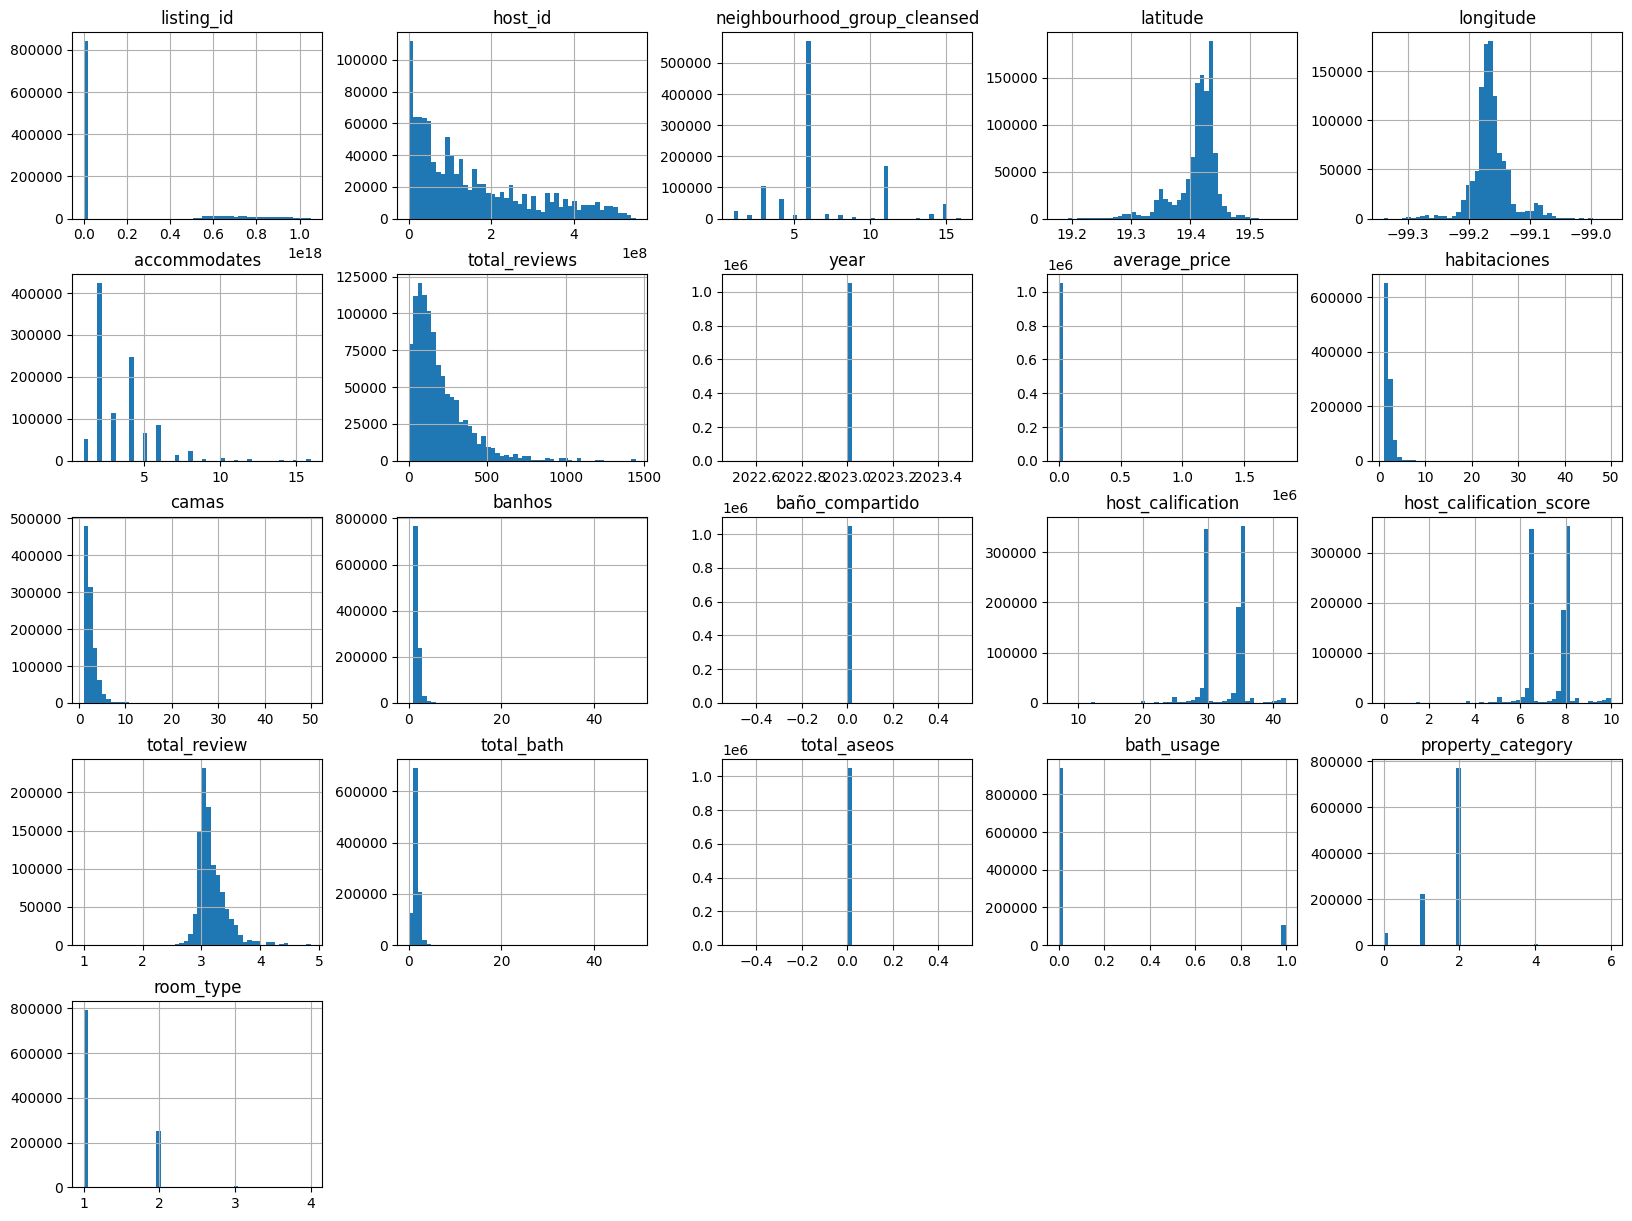

In [157]:
df.hist( bins=50, figsize=(20,15))

Descripción de las variables.

In [158]:
description = df.describe(include='all')
description.T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
listing_id,1050473.0,NaN,NaN,NaN,147205504025008544.0,300787976439256320.0,44616.0,21812920.0,37207688.0,52222774.0,1053090696868899712.0
reviewer_name,1050473,96746,Daniel,9892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,1050473.0,NaN,NaN,NaN,149643280.741237,139115081.423333,7365.0,35255741.0,104039721.0,229771227.0,550591695.0
neighbourhood_cleansed,1050473,16,Cuauhtémoc,569777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group_cleansed,1050473.0,NaN,NaN,NaN,6.840091,3.182722,1.0,6.0,6.0,7.0,16.0
latitude,1050473.0,NaN,NaN,NaN,19.411811,0.034384,19.178144,19.40382,19.41932,19.43315,19.56101
longitude,1050473.0,NaN,NaN,NaN,-99.163775,0.030586,-99.33963,-99.177058,-99.16627,-99.15275,-98.96645
accommodates,1050473.0,NaN,NaN,NaN,3.491738,2.110678,1.0,2.0,3.0,4.0,16.0
total_reviews,1050473.0,NaN,NaN,NaN,195.452878,176.679952,1.0,76.0,145.0,265.0,1446.0
year,1050473.0,NaN,NaN,NaN,2023.0,0.0,2023.0,2023.0,2023.0,2023.0,2023.0


Evaluación de la asimetría.

In [159]:
skewness = df.skew()
print("Skewness:\n", skewness)


Skewness:
 listing_id                        1.642136
host_id                           0.996289
neighbourhood_group_cleansed      0.945959
latitude                         -1.594782
longitude                         0.203704
accommodates                      2.223087
total_reviews                     2.228653
year                              0.000000
average_price                   209.270636
habitaciones                      4.055397
camas                             3.771667
banhos                            4.695446
baño_compartido                   0.000000
host_calification                -0.904789
host_calification_score          -0.903713
total_review                      1.679334
total_bath                        3.353592
total_aseos                       0.000000
bath_usage                        2.596052
property_category                -1.216912
room_type                         1.597848
dtype: float64


C:\Users\pejer\AppData\Local\Temp\ipykernel_11212\1381220554.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


Detección de outliers.

In [12]:
from sklearn.preprocessing import LabelEncoder

def outliers1(df):
    # Codificar las columnas categóricas
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
    
    # Calcular la cantidad de outliers para cada columna
    for column in df:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1 - (1.5 * IQR)
        outlierDer = Q3 + (1.5 * IQR)
        outliers = df[column][(df[column] < outlierIzq) | (df[column] > outlierDer)]
        print("La variable " + column + " tiene " + str(len(outliers)) + " valores outliers")

# Llama a la función con tu DataFrame
outliers1(df)


La variable listing_id tiene 0 valores outliers
La variable reviewer_name tiene 0 valores outliers
La variable host_id tiene 4444 valores outliers
La variable neighbourhood_cleansed tiene 73012 valores outliers
La variable neighbourhood_group_cleansed tiene 441705 valores outliers
La variable latitude tiene 116755 valores outliers
La variable longitude tiene 96722 valores outliers
La variable accommodates tiene 49957 valores outliers
La variable total_reviews tiene 42309 valores outliers
La variable year tiene 0 valores outliers
La variable average_price tiene 54748 valores outliers
La variable tipo_de_casa tiene 0 valores outliers
La variable localizacion tiene 100354 valores outliers
La variable calificacion_propiedad tiene 31817 valores outliers
La variable habitaciones tiene 22749 valores outliers
La variable camas tiene 107887 valores outliers
La variable banhos tiene 11660 valores outliers
La variable baño_compartido tiene 0 valores outliers
La variable host_calification tiene 89

Función para reemplazar los outliers mediante el método de Isolation Forest.

In [24]:


def reemplazar_outliers_isolation_forest(df):
    """
    Reemplazar los outliers del df usando el método Isolation Forest.
    """
        
    # Manejar valores nulos
    df.fillna(df.median(), inplace=True)  # Puedes ajustar la estrategia de imputación según sea necesario
    
    label_encoder = LabelEncoder()

    # Iterar sobre las columnas especificadas
    for columna in df:
        if df[columna].dtype == 'object':  # Verifica si la columna no es numérica
            df[columna] = label_encoder.fit_transform(df[columna])
            continue  # Saltar al siguiente bucle si la columna es no numérica
        
        # Obtener los valores de la columna
        column_values = df[columna].values.reshape(-1, 1)

        # Crear y ajustar el modelo Isolation Forest
        outlier_detector = IsolationForest(contamination='auto')
        outlier_detector.fit(column_values)

        # Predicción de outliers
        outlier_labels = outlier_detector.predict(column_values)

        # Reemplazar outliers con el valor medio de la columna
        df[columna] = np.where(outlier_labels == -1, df[columna].median(), df[columna])
    
    return df



In [25]:
reemplazar_outliers_isolation_forest(df)

C:\Users\pejer\AppData\Local\Temp\ipykernel_15028\1607567552.py:10: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)  # Puedes ajustar la estrategia de imputación según sea necesario


,listing_id,reviewer_name,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,total_reviews,year,...,banhos,baño_compartido,host_calification,host_calification_score,total_review,total_bath,total_aseos,bath_usage,property_category,room_type
0,37207688.0,53998,104039721.0,4,6.0,19.411620,-99.177940,3.0,66.0,2023.0,...,1.0,0.0,34.8,7.94,2.95,1.0,0.0,0.0,2.0,1.0
1,37207688.0,78455,104039721.0,4,6.0,19.411620,-99.177940,3.0,66.0,2023.0,...,1.0,0.0,34.8,7.94,2.95,1.0,0.0,0.0,2.0,1.0
2,37207688.0,7051,104039721.0,4,6.0,19.411620,-99.177940,3.0,66.0,2023.0,...,1.0,0.0,34.8,7.94,2.95,1.0,0.0,0.0,2.0,1.0
3,37207688.0,81097,104039721.0,4,6.0,19.411620,-99.177940,3.0,66.0,2023.0,...,1.0,0.0,34.8,7.94,2.95,1.0,0.0,0.0,2.0,1.0
4,37207688.0,52833,104039721.0,4,6.0,19.411620,-99.177940,3.0,66.0,2023.0,...,1.0,0.0,34.8,7.94,2.95,1.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050468,37207688.0,48080,23468816.0,4,6.0,19.410690,-99.173869,3.0,145.0,2023.0,...,1.0,0.0,35.0,8.00,3.00,1.0,0.0,0.0,2.0,1.0
1050469,37207688.0,62615,23468816.0,4,6.0,19.410690,-99.173869,3.0,145.0,2023.0,...,1.0,0.0,35.0,8.00,3.00,1.0,0.0,0.0,2.0,1.0
1050470,37207688.0,41028,26445280.0,9,11.0,19.419320,-99.198898,3.0,145.0,2023.0,...,1.0,0.0,34.8,7.94,3.00,1.0,0.0,0.0,2.0,1.0
1050471,37207688.0,6764,104039721.0,4,6.0,19.408469,-99.173216,3.0,145.0,2023.0,...,2.0,0.0,29.7,6.49,3.12,1.0,0.0,0.0,2.0,1.0


Matriz de correlación por Spearman.

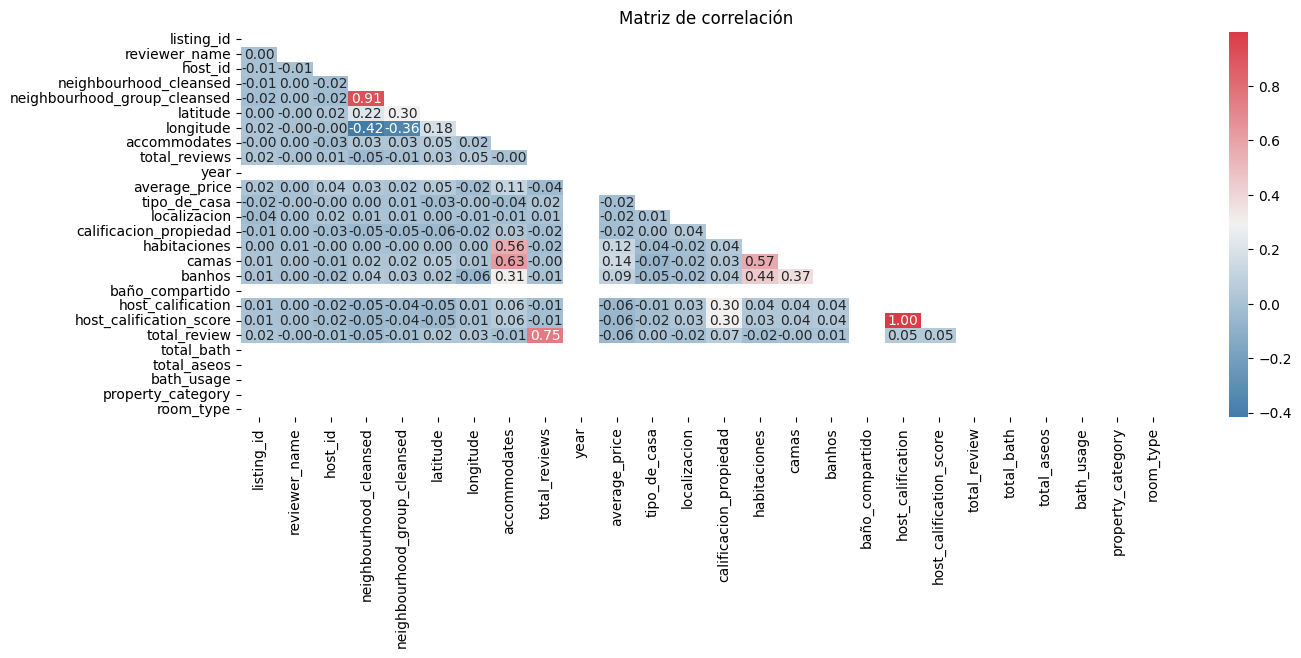

In [16]:
plt.figure(figsize=(15, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df.corr(method='spearman'), annot=True, cmap=cmap, fmt=".2f", mask=mask)
plt.title('Matriz de correlación')
plt.show()

Normalizar variables con Min Max Scaler.

In [26]:
def normalizar_variables(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Verifica si la columna es de tipo objeto (no numérica)
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        else:
            scaler = MinMaxScaler()
            df[[col]] = scaler.fit_transform(df[[col]])
    return df

# Suponiendo que 'df' es tu DataFrame
df = normalizar_variables(df)

Elección de las variables con mayor correlación.

In [27]:
def correlation(dataset, threshold):
    col_corr = set()  # Nombre de todas las columnas.
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # Valor absoluto del coeficiente.
                colname = corr_matrix.columns[i]  # Obtener el nombre de la columna.
                col_corr.add(colname)
    return col_corr

correlation(df, 0.5)

{'camas', 'habitaciones', 'host_calification_score', 'total_review'}

Crear un df con las variables que tienen una correlacion alta con la variable objetivo.

In [29]:
df = df[['camas',
 'habitaciones',
 'host_calification_score',
 'neighbourhood_group_cleansed',
 'room_type', 'accommodates',
 'total_review',
 'average_price']]

Guardar datos como CSV.

In [30]:
df.to_csv('datos_limpios_airbnb_alta_correlacion.csv', index = False)

# Regresión.

Cargar datos.

In [2]:
df = pd.read_csv('datos_limpios_airbnb.csv', low_memory=False)

Seleccionar variables objetivo.

In [3]:
df = df[['camas',
 'habitaciones',
 'host_calification_score',
 'neighbourhood_group_cleansed',
 'room_type', 'accommodates',
 'total_review',
 'average_price']]

Muestra aleatoria del 10% del DataFrame.

In [4]:
muestra_aleatoria = df.sample(frac=0.1)  # Obtener el 10% de las filas

Configuración del entorno de trabajo para la regresión según la variable objetivo.

In [5]:
setup(data=muestra_aleatoria, target='average_price', session_id=357)



,Description,Value
0,Session id,357
1,Target,average_price
2,Target type,Regression
3,Original data shape,"(105047, 8)"
4,Transformed data shape,"(105047, 8)"
5,Transformed train set shape,"(73532, 8)"
6,Transformed test set shape,"(31515, 8)"
7,Numeric features,7
8,Rows with missing values,3.1%
9,Preprocess,True


Comparación de los modelos de regresión.

In [6]:
best = compare_models()

Crear modelo con el modelo de regresión seleccionado.

In [7]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,206.2823,4489068.3659,2118.7422,0.2197,0.6675,0.7498
1,208.9682,3102181.3393,1761.3010,0.2811,0.6981,0.8088
2,169.5292,481319.6323,693.7720,0.8809,0.6694,0.7680
3,192.7041,3217672.3679,1793.7872,-1.8376,0.6588,0.8035
4,185.5798,638566.0419,799.1033,0.4574,0.7068,1.0029
5,279.9753,67571587.6169,8220.1939,0.0425,0.6864,0.8089
6,205.0039,997332.9917,998.6656,0.3228,0.7097,0.8240
7,193.6420,902430.9013,949.9636,0.3743,0.6942,0.8612
8,199.2693,1843765.8604,1357.8534,0.2751,0.6735,0.7468


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Afinar el ajuste de los hiperparámetros.

In [8]:
tuned_dt = tune_model(dt)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Observar la importancia de las variables.

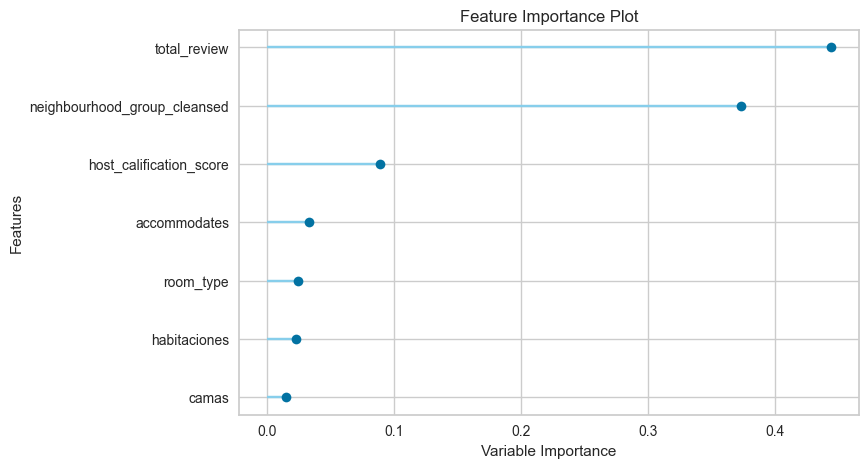

In [9]:
plot_model(tuned_dt, plot = 'feature')

Comprobar residuos y ajuste al modelo.

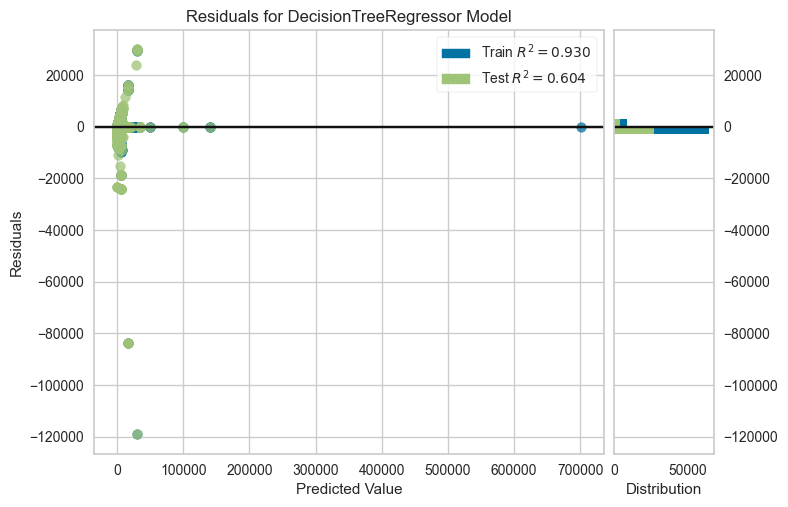

In [10]:
plot_model(tuned_dt, plot = 'residuals')

Finalizar el modelo.

In [11]:
final_dt = finalize_model(tuned_dt)

Guardar el modelo.

In [12]:
save_model(final_dt, 'dt_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['camas', 'habitaciones',
                                              'host_calification_score',
                                              'neighbourhood_group_cleansed',
                                              'room_type', 'accommodates',
                                              'total_review'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', DecisionTreeRegressor(random_state=357))]),
 'dt_model.pkl')